In [1]:
import pandas as pd
ratings_title = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_table('./ml-100k/u.data',header=None, names=ratings_title, engine = 'python')
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [2]:
users_title = ['UserID', 'Age', 'Gender', 'Occupation','Zipcode']
users = pd.read_table('./ml-100k/u.user',sep='|',header=None, names=users_title, engine = 'python')
users.head()

,UserID,Age,Gender,Occupation,Zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
movies_title = ['ID', 'Title', 'Release_date','Video_release_date','IMDb URL','Unknown','Action','Adventure','Animation', 'Childrens','Comedy',
'Crime', 'Documentary', 'Drama' ,'Fantasy', 'Film-Noir','Horror','Musical','Mystery' ,'Romance','Sci-Fi', 'Thriller','War' ,'Western']
movies = pd.read_table('./ml-100k/u.item',sep='|',header=None, names=movies_title, engine = 'python',encoding='ISO-8859-1')
movies.head()

,ID,Title,Release_date,Video_release_date,IMDb URL,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#looking for some initial statistics of data
print('No of Users who rated movies:', ratings.UserID.nunique())
print('No of Movies:', ratings.MovieID.nunique())
print('No of ratings:', ratings.Rating.count())

No of Users who rated movies: 943
No of Movies: 1682
No of ratings: 100000


In [5]:
df_rating = ratings.copy()
df_user = users.copy()
df_movie = movies.copy()
del df_rating['Timestamp']
del df_user['Zipcode']
del df_movie['Release_date']
del df_movie['Video_release_date']
del df_movie['IMDb URL']

In [6]:
count = 0
for i in df_movie['Unknown']:
    if i != 0:
        count += 1
print("num of unknown:",count)

num of unknown: 2


In [7]:
#add year from title feature
year_list = df_movie['Title'].str.findall('\((\d{4})\)').str.get(0)
df_movie['Year'] = year_list

In [8]:

#seperate genre for each movie and count genres
genre_list = ['Unknown','Action','Adventure','Animation', 'Childrens','Comedy', 'Crime', 'Documentary', 
'Drama' ,'Fantasy', 'Film-Noir','Horror','Musical','Mystery' ,'Romance','Sci-Fi', 'Thriller','War' ,'Western']
tt = ['']*1682
ttt = [0]*1682
tmp = df_movie[genre_list]
for i in range(1682):
    for j in range(19):
        if tmp.loc[i][j] == 1:
            if tt[i] == '':
                tt[i] = genre_list[j]
            else:
                tt[i] = tt[i] + '|'
                tt[i] = tt[i] + genre_list[j]
            ttt[i] += 1
print(tt[:10])
print(ttt[:10])

['Animation|Childrens|Comedy', 'Action|Adventure|Thriller', 'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller', 'Drama', 'Drama|Sci-Fi', 'Childrens|Comedy|Drama', 'Drama', 'Drama|War']
[3, 3, 1, 3, 3, 1, 2, 3, 1, 2]


In [9]:
#assigning everything to same dataframe
df_movie['genre_count'] = ttt
df_movie['genre'] = tt

df_movie.head()

,ID,Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,genre_count,genre
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1995,3,Animation|Childrens|Comedy
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,3,Action|Adventure|Thriller
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1995,1,Thriller
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1995,3,Action|Comedy|Drama
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1995,3,Crime|Drama|Thriller


In [10]:
df_movie.columns

Index(['ID', 'Title', 'Unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Year', 'genre_count', 'genre'],
      dtype='object')

In [11]:
old_column = ['ID', 'Title', 'Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year', 'genre_count', 'genre']
new_column = [
'ID', 'Title' ,'Year', 'genre', 'genre_count','Unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
df_movie[old_column] = df_movie[new_column]
df_movie.columns = new_column
df_movie.head()

,ID,Title,Year,genre,genre_count,Unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,Animation|Childrens|Comedy,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995,Action|Adventure|Thriller,3,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995,Thriller,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995,Action|Comedy|Drama,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995,Crime|Drama|Thriller,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
#avg movie ratings by movied id and count
#avg movie ratings by user id and count
rating_avg = df_rating.groupby('MovieID')['Rating'].mean().reset_index()
rating_avg = pd.DataFrame(rating_avg)

rating_count = df_rating.groupby('MovieID')['Rating'].count().reset_index()
rating_count = pd.DataFrame(rating_count)
rating_count.rename({'Rating': 'Rating_count'}, axis=1, inplace=True)

user_rating = df_rating.groupby('UserID')['Rating'].mean().reset_index()
user_rating = pd.DataFrame(user_rating)

user_count = df_rating.groupby('UserID')['Rating'].count().reset_index()
user_count = pd.DataFrame(user_count)
user_count.rename({'Rating': 'Rating_count'}, axis=1, inplace=True)

df_movie_info = rating_avg.merge(rating_count, on = 'MovieID', how='inner')

df_user_info = user_rating.merge(user_count, on = 'UserID', how='inner')

In [13]:
print(df_user_info.head())
print(df_movie_info.head())

   UserID    Rating  Rating_count
0       1  3.610294           272
1       2  3.709677            62
2       3  2.796296            54
3       4  4.333333            24
4       5  2.874286           175
   MovieID    Rating  Rating_count
0        1  3.878319           452
1        2  3.206107           131
2        3  3.033333            90
3        4  3.550239           209
4        5  3.302326            86


In [14]:
df_movie['Aver_rating'] = df_movie_info['Rating']
df_movie['Rating_count'] = df_movie_info['Rating_count']
df_movie.head()

,ID,Title,Year,genre,genre_count,Unknown,Action,Adventure,Animation,Childrens,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Aver_rating,Rating_count
0,1,Toy Story (1995),1995,Animation|Childrens|Comedy,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,3.878319,452
1,2,GoldenEye (1995),1995,Action|Adventure|Thriller,3,0,1,1,0,0,...,0,0,0,0,0,1,0,0,3.206107,131
2,3,Four Rooms (1995),1995,Thriller,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.033333,90
3,4,Get Shorty (1995),1995,Action|Comedy|Drama,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3.550239,209
4,5,Copycat (1995),1995,Crime|Drama|Thriller,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.302326,86


In [15]:
df_movie.describe()

,ID,genre_count,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Aver_rating,Rating_count
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,1.719976,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052,3.076045,59.453032
std,485.695893,0.868207,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714,0.781662,80.383846
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,421.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.659600,6.000000
50%,841.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.161528,27.000000
75%,1261.750000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.653428,80.000000
max,1682.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,583.000000


In [16]:
df_user['Aver_rating'] = df_user_info['Rating']
df_user['Rating_count'] = df_user_info['Rating_count']
df_user.head()

,UserID,Age,Gender,Occupation,Aver_rating,Rating_count
0,1,24,M,technician,3.610294,272
1,2,53,F,other,3.709677,62
2,3,23,M,writer,2.796296,54
3,4,24,M,technician,4.333333,24
4,5,33,F,other,2.874286,175


In [17]:
df_user.describe()

,UserID,Age,Aver_rating,Rating_count
count,943.000000,943.000000,943.000000,943.000000
mean,472.000000,34.051962,3.588191,106.044539
std,272.364951,12.192740,0.445233,100.931743
min,1.000000,7.000000,1.491954,20.000000
25%,236.500000,25.000000,3.323054,33.000000
50%,472.000000,31.000000,3.620690,65.000000
75%,707.500000,43.000000,3.869565,148.000000
max,943.000000,73.000000,4.869565,737.000000


<AxesSubplot:xlabel='Year', ylabel='Density'>

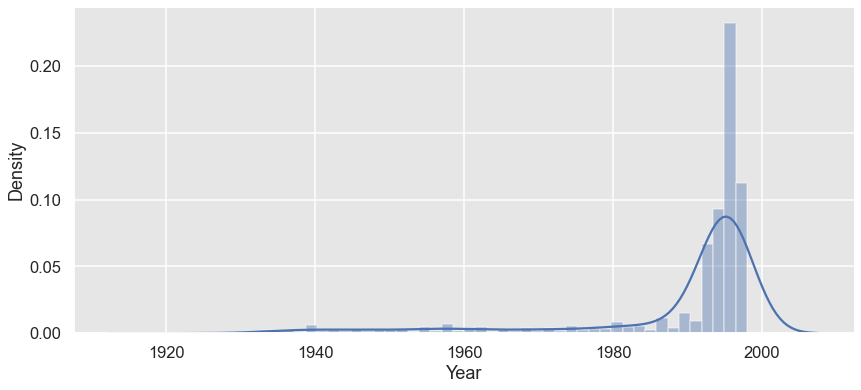

In [18]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(14, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) #sns.axes_style("whitegrid")

sns.distplot(df_movie.Year)

(1980.0, 2000.0)

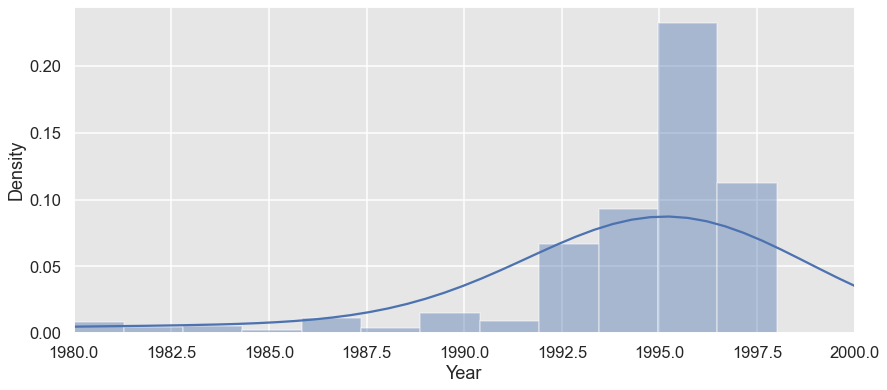

In [19]:
sns.distplot(df_movie.Year)
plt.xlim(1980, 2000)

In [20]:
count_genre = [0]*19
for i in range(1682):
    for j in range(19):
        if tmp.loc[i][j] == 1:
            count_genre[j] += 1
print(count_genre)

[2, 251, 135, 42, 122, 505, 109, 50, 725, 22, 24, 92, 56, 61, 247, 101, 251, 71, 27]


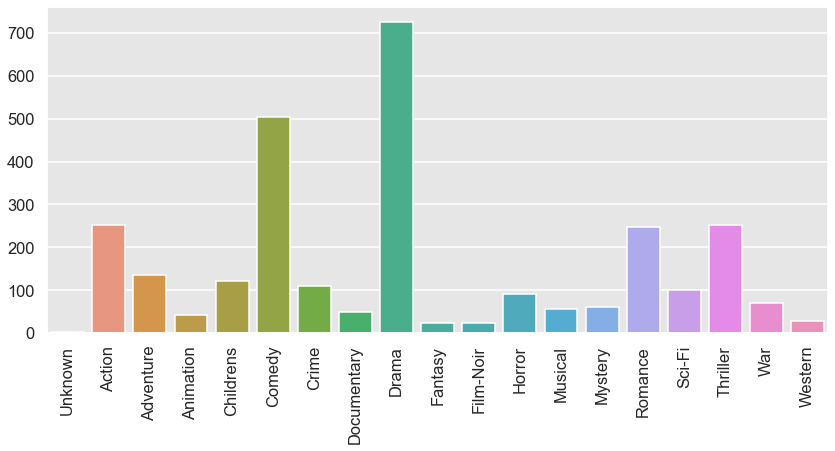

In [21]:
sns.barplot(x = genre_list, y=count_genre)
plt.xticks(rotation=90)
plt.show()

In [22]:
genre_rating = [[] for row in range(19)]
for i in range(1682):
    for j in range(19):
        if tmp.loc[i][j] == 1:
            genre_rating[j].append(df_movie.loc[i][24])

In [23]:
genre_average_rating = [ 0 for row in range(19)]
for i in range(19):
    genre_average_rating[i] = np.mean(genre_rating[i])
print(genre_average_rating)

[2.2222222222222223, 2.9663324037589853, 3.14396731369761, 3.298813080382377, 2.916884891868897, 3.0005649618406736, 3.2110147495997534, 3.229273094093941, 3.187353414297331, 2.849830297920943, 3.5483508757184237, 2.7301573529961387, 3.376423123539873, 3.3368139323830244, 3.2440490301647986, 3.1654460532512894, 3.1366924755638346, 3.48918542894357, 3.185617473056144]


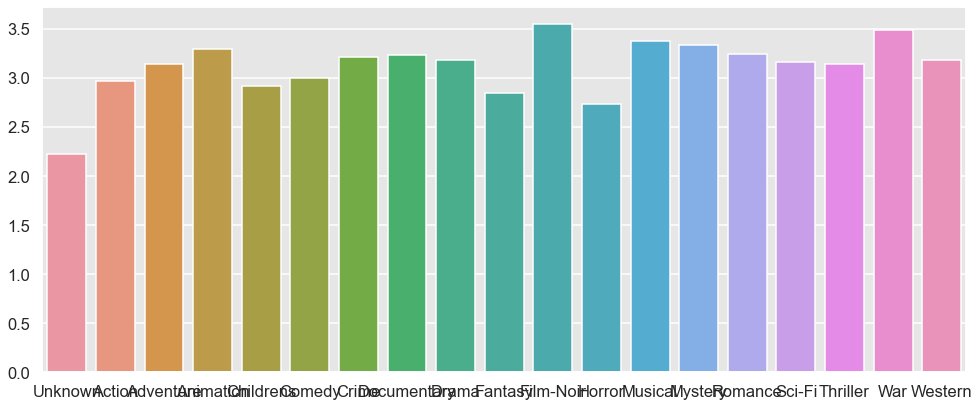

In [24]:
sns.barplot(x=genre_list, y=genre_average_rating)
plt.tight_layout()

In [25]:
df_tmp = pd.DataFrame(genre_rating)
df_tmp = df_tmp.T
df_tmp.columns = genre_list
df_tmp.head()

,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3.444444,3.206107,3.206107,3.878319,3.878319,3.878319,3.302326,3.790123,3.550239,3.193798,4.138182,3.119565,2.761905,4.053476,3.967213,3.798469,3.206107,3.831461,3.456790
1,1.000000,3.550239,2.761905,3.781818,3.995434,3.550239,3.847458,4.094017,3.302326,3.500000,2.931507,3.000000,3.781818,3.969112,3.205128,3.008333,3.033333,4.151515,3.468750
2,NaN,3.119565,3.448276,3.812785,2.181818,3.995434,4.385768,3.000000,3.576923,2.966667,4.161616,3.260274,3.587413,3.227723,3.416667,3.264368,3.302326,3.629870,3.792969
3,NaN,2.761905,2.666667,3.709302,3.097561,3.418478,3.119565,3.733333,3.798469,2.914110,4.210145,3.234783,3.812785,4.163043,3.453608,4.358491,3.847458,4.358491,3.861314
4,NaN,4.151515,2.181818,3.260274,3.781818,3.205128,3.448276,4.500000,3.995434,3.833333,4.200000,4.034364,3.709302,2.574803,2.153846,3.141732,4.385768,3.456790,3.868132


In [26]:
data_kind = []
data_rate = []
for i in range(19):
    for score in genre_rating[i]:
        data_kind.append(genre_list[i])
        data_rate.append(score)

(0.0, 6.0)

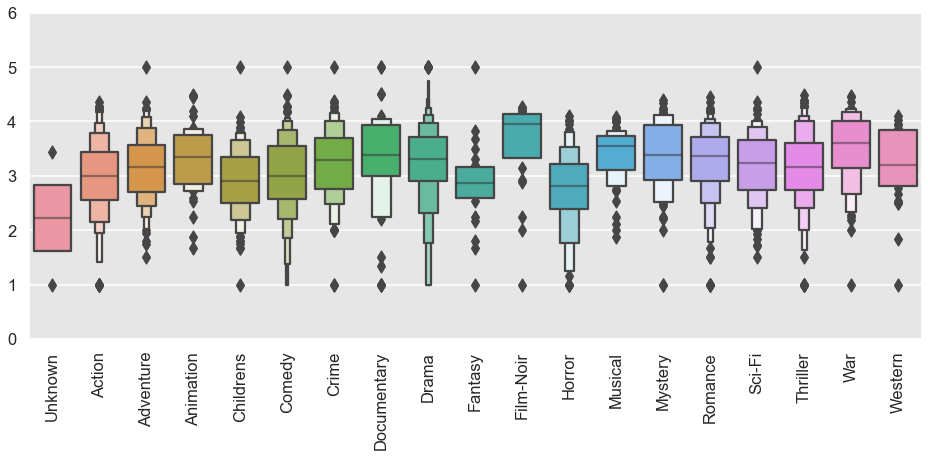

In [27]:
sns.set(rc={'figure.figsize':(16, 6)})
sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.boxenplot(x=data_kind,y=data_rate)
plt.xticks(rotation=90)
plt.ylim(0, 6)

In [28]:
# movie | year
year = [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998]
new_data = [[0 for year in range(9) ] for kind in range(19)]
for i in range(1682):
    for j in range(19):
        if df_movie.loc[i][j+5] == 1:
            for k in year:
                if df_movie.loc[i][2] == str(k):
                    new_data[j][k-1990] += 1

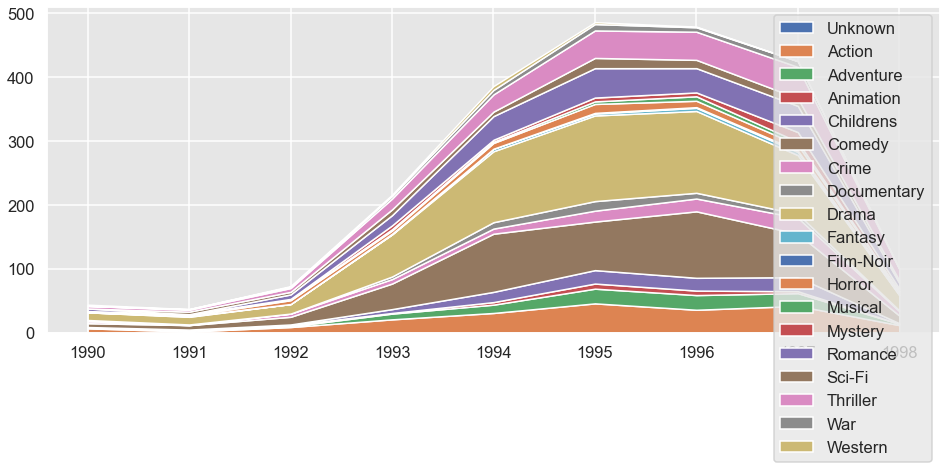

In [29]:
plt.stackplot(year,new_data,labels=genre_list)
plt.legend(loc='best')
plt.show()

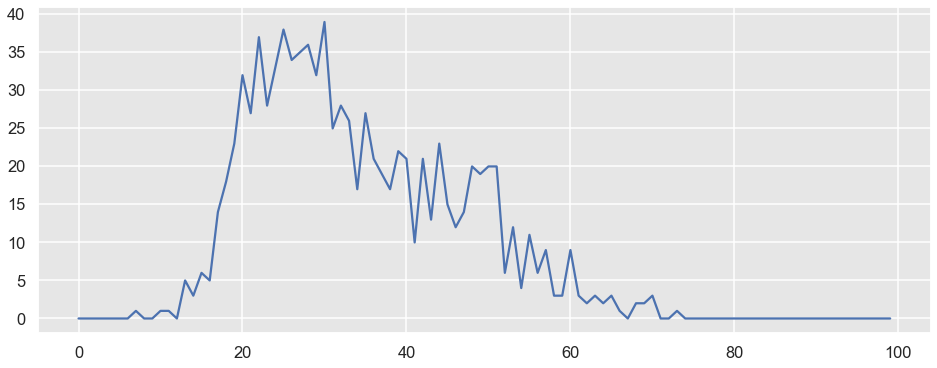

In [30]:
# user | profession | rating | gender
age_range = np.linspace(0,99,100)
age_list = [0 for age in range(100)]
for i in range(943):
    age_list[df_user.loc[i][1]] += 1
plt.plot(age_range,age_list)

In [31]:
age_rate_list = [[] for i in range(6)]  # 0-20 20-30 30-40 40-50 50-60 60-80
for i in range(943):
    tm_age = df_user.loc[i][1]
    if tm_age <= 20:
        age_rate_list[0].append(df_user.loc[i][4])
    elif tm_age <= 30:
        age_rate_list[1].append(df_user.loc[i][4])
    elif tm_age <= 40:
        age_rate_list[2].append(df_user.loc[i][4])
    elif tm_age <= 50:
        age_rate_list[3].append(df_user.loc[i][4])
    elif tm_age <= 60:
        age_rate_list[4].append(df_user.loc[i][4])
    elif tm_age <= 80:
        age_rate_list[5].append(df_user.loc[i][4])
age_rate_aver_list = [ 0 for i in range(6)]
for i in range(6):
    age_rate_aver_list[i] = np.mean(age_rate_list[i])
age_rate_aver_list

[3.5579780207557516,
 3.5383631444408614,
 3.615880221022234,
 3.6020036425307995,
 3.733803029093791,
 3.570816129184168]

In [32]:
occupation_list = ['administrator','artist','doctor','educator','engineer', 'entertainment','executive','healthcare','homemaker','lawyer',
'librarian','marketing','none','other','programmer','retired','salesman','scientist','student','technician','writer']
occu_count_dict = {'administrator':0,'artist':0,'doctor':0,'educator':0,'engineer':0, 'entertainment':0,'executive':0,'healthcare':0,'homemaker':0,'lawyer':0,
'librarian':0,'marketing':0,'none':0,'other':0,'programmer':0,'retired':0,'salesman':0,'scientist':0,'student':0,'technician':0,'writer':0}
occu_rate_dict = {'administrator':[],'artist':[],'doctor':[],'educator':[],'engineer':[], 'entertainment':[],'executive':[],'healthcare':[],'homemaker':[],
'lawyer':[],'librarian':[],'marketing':[],'none':[],'other':[],'programmer':[],'retired':[],'salesman':[],'scientist':[],'student':[],'technician':[],'writer':[]}
for i in range(943):
    occu_rate_dict[df_user.loc[i][3]].append(df_user.loc[i][4])
    occu_count_dict[df_user.loc[i][3]] += 1

In [33]:
occu_count_list = [0 for i in range(21)]
occu_rate_list = [[] for i in range(21)]
occu_rate_aver_list = [0 for i in range(21)]
for i in range(21):
    occu_count_list[i] = occu_count_dict[occupation_list[i]]
    occu_rate_list[i] = occu_rate_dict[occupation_list[i]]
    occu_rate_aver_list[i] = np.mean(occu_rate_list[i])

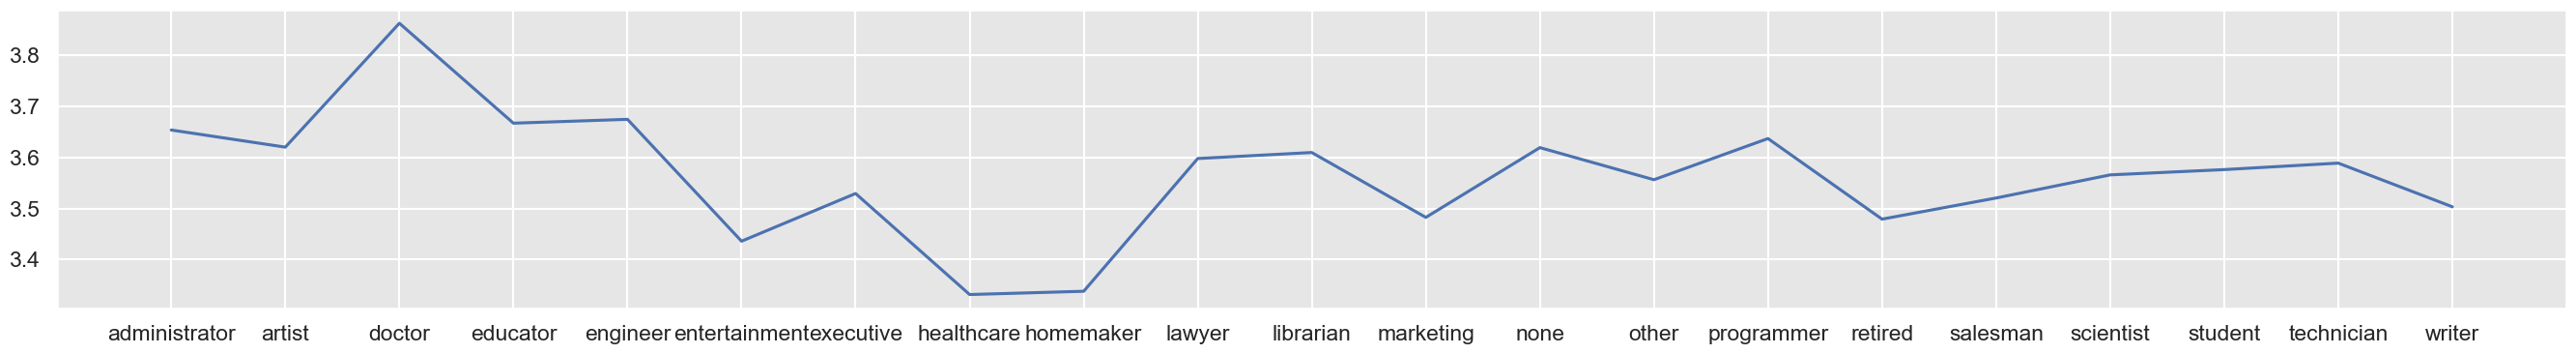

In [34]:
plt.figure(figsize=(27,4),dpi=100)
plt.plot(occupation_list,occu_rate_aver_list)
plt.tight_layout()

In [35]:
gender_rate_list = [[],[]]  # 0 female 1 male
gender_count_list = [0,0]
for i in range(943):
    if df_user.loc[i][2] == 'F':
        gender_count_list[0] += 1
        gender_rate_list[0].append(df_user.loc[i][4])
    elif df_user.loc[i][2] == 'M':
        gender_count_list[1] += 1
        gender_rate_list[1].append(df_user.loc[i][4])
print("female_count", gender_count_list[0])
print("female_aver_rating", np.mean(gender_rate_list[0]))
print("male_count", gender_count_list[1])
print("male_aver_rating", np.mean(gender_rate_list[1]))


female_count 273
female_aver_rating 3.587178522979327
male_count 670
male_aver_rating 3.5886036974655373
